<a href="https://colab.research.google.com/github/KKseniaK/myPortfolio/blob/main/Regression_model_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A larger example

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_regio`n.

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape, insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


((1338, 7), None)

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now we'll split data into `features (X)` and `labels (y)`.

In [ ]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

And create training and test sets.

`train_test_split` function available from **Scikit-Learn**.

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

Now we can build and fit **a model** (we'll make it the same as `model_2`).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 8697.6006 - mae: 8697.6006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7888.5664 - mae: 7888.5664
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7580.0557 - mae: 7580.0557
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7686.1323 - mae: 7686.1323
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7688.0786 - mae: 7688.0786
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7603.1401 - mae: 7603.1401
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 7598.8750 - mae: 7598.8750
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.9424 - mae: 7792.9424
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7559.1968 - mae: 7559.1968
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7656.0820 - mae: 7656.0820

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7494.0464 - mae: 7494.0464


[7494.04638671875, 7494.04638671875]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the results of the insurance model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4817.7534 - mae: 4817.7534


[4817.75341796875, 4817.75341796875]

Посмотрим на кривую потерь(график уменьшения ошибки в соотношении с пройденными эпохами)

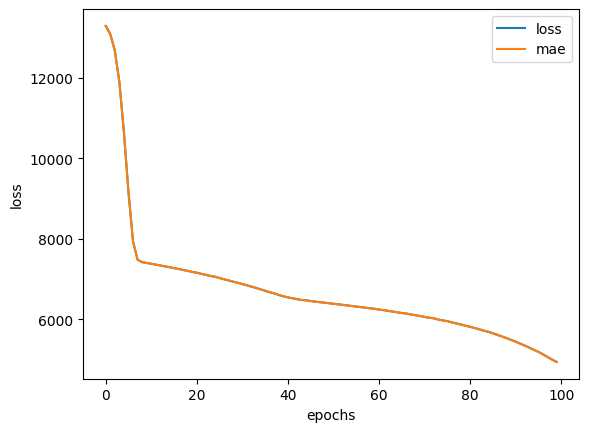

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

> 🤔 **Question:** How long should you train for?

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an **EarlyStopping callback** so **it stops automatically when it stops improving**.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [ ]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3493.5044 - mae: 3493.5044


(3493.50439453125, 3493.50439453125)

Training for an extra 100 epochs we see about a 10% decrease in error.

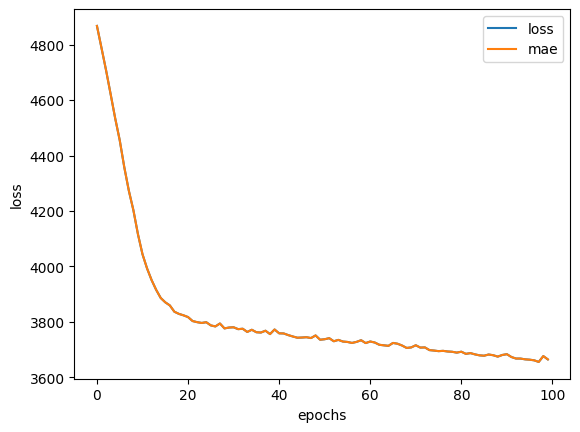

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

# Предварительная обработка данных.
# **Preprocessing data (normalization and standardization)**

**Стандартизация** и **нормализация** — это два способа масштабирования данных.

**Стандартизация** изменяет масштаб набора данных, чтобы иметь среднее значение 0 и стандартное отклонение 1.

**Нормализация** масштабирует набор данных таким образом, чтобы каждое значение находилось в диапазоне от 0 до 1

preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* **Preprocessing**:
 * Normalizing data (making sure all values are between 0 and 1).
 * Standardization (making sure all values have a mean of 0 and a variance of 1).


 Нормализация (**normalization**) и стандартизация (**standardization**) являются методами изменения диапазонов значений — шкалирования. Шкалирование особенно полезно в машинном обучении (Machine Learning), поскольку разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут имеет диапазон от 0 до 1, а второй — от 1 до 1000. Для задачи регрессии второй атрибут оказывал бы большое влияние на обучение, хотя не факт, что он является более важным, чем первый. Нормализация и стандартизация отличаются своими подходами:

* Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

* Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

**Обычно достаточно нормализовать данные.** Например, в глубоком обучении (Deep Learning) требуется перевести цвета изображений RGB из диапазона 0-255 к диапазону 0-1. А вот стандартизацию стоит применять при использование алгоритмов, которые основываются на измерении расстояний, например, k ближайших соседей или метод опорных векторов (SVM).

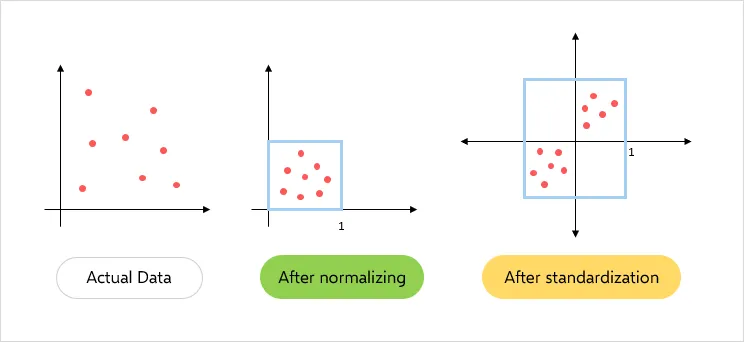

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1)

To do this, we're going to use a few classes from Scikit-Learn:

* `make_column_transformer` - build a multi-step data preprocessing function for the folllowing transformations:
  * `MinMaxScaler` - make sure all numerical columns are normalized (between 0 and 1).
  * `OneHotEncoder` - one hot encode the non-numerical columns.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as `insurance_model_2`

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
#Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3175.0605 - mae: 3175.0605


In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3493.50439453125, 3175.060546875)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.